# Sampling

In [61]:
import numpy as np
import pandas as pd
from utils import *
import matplotlib.pyplot as plt
from tqdm import tqdm

# SO WE NEED TO SOMEhow pick x random numbers in the range(0,len(vecs)-1)
'''
Lets get a couple sampling algos set up
* Random
* Sample uniformly
* Sample according to eigvals (use np.random.sample(…, p = wavefuncts**2)
'''

def random_index(x=5, N=252):
    a = (np.random.random_sample(x)*N).astype(int)
    while x!=len(set(a)):
        a = np.append(a,int(np.random.random_sample()*N))
    return a # use np.random.sample

def uni_index(x=5,N=252):
    a = np.linspace(0,N-1,x).astype(int)
    return a

def eigval_index(x=5, N=252):
    return np.arange(x)


In [62]:
uni_index()

array([  0,  62, 125, 188, 251])

100%|██████████| 8/8 [02:41<00:00, 20.22s/it]


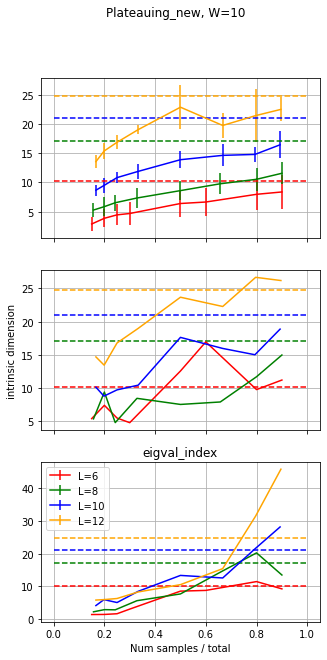

In [98]:

Ls, W, seed = [6,8,10,12], 10, 1
ruuns = [200,100,20,5]
sample_methods = [random_index, uni_index, eigval_index]
colors = 'red, green, blue, orange'.split(', ')

fig, ax = plt.subplots(3,1, figsize=(5,10), sharex=True)

for L, runs, color in zip(Ls,ruuns, colors):
    N = binomial(L)
    samples = [N//6,N//5,N//4,N//3,N//2, N//3*2, N//5*4, N//10*9]
    data_dict = {}

    vals, vecs = np.linalg.eigh(constructHamiltonian(L,W=W, seed=seed, periodic_boundary_conditon=True))

    data_dict['All samples'] = nn2(vecs)[0]

    for sample_method in sample_methods:
        data_dict[sample_method] = {}
        for i in tqdm(samples):
            data_dict[sample_method][i] = []

            if sample_method == sample_methods[0]:
                for j in range(runs):
                    sample_index = sample_method(i, N)
                    #print(sample_index)
                    vecs_sample = vecs[:,sample_index]
                    data_dict[sample_method][i].append(nn2(vecs_sample)[0])
            else:
                sample_index = sample_method(i, N)
                #print(sample_index)
                vecs_sample = vecs[:,sample_index]
                data_dict[sample_method][i].append(nn2(vecs_sample)[0])
    #print(data_dict)

    

    for index, s in enumerate(sample_methods):

        x = np.array(list(data_dict[s].keys()))/N
        y = [np.mean(data_dict[s][X]) for X in data_dict[s].keys()]
        yerr = [np.std(data_dict[s][X]) for X in data_dict[s].keys()]
        #print(x, y, yerr)

        ax[index].errorbar(x,y,yerr, label='L={}'.format(L), color=color)
        ax[index].plot([0,1],[data_dict['All samples'],data_dict['All samples']],ls='--',c=color)
        ax[index].title(str(s).split()[1])
        data = np.vstack([x,y,yerr])
        np.savez('data/plateau/L{}_W{}_{}.npz'.format(L,W,s),data)

plt.xlabel('Num samples / total')
ax[1].set_ylabel('intrinsic dimension')

fig.suptitle('Plateauing_new, W={}'.format(W))
plt.legend()
[ax[i].grid() for i in range(3)]
plt.show()



In [94]:
str(s).split(' ')[1]

'eigval_index'